In [31]:
import os
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import pprint
import cv2 

This is the list of all the files present in the path given to us:

['abomasnow.png', 'abra.png', 'absol.png', 'accelgor.png', 'aegislash-blade.png', 'aerodactyl.png', 'aggron.png', 'aipom.png', 'alakazam.png', 'alomomola.png', 'altaria.png', 'amaura.png', 'ambipom.png', 'amoonguss.png', 'ampharos.png', 'anorith.png', 'araquanid.jpg', 'arbok.png', 'arcanine.png', 'arceus.png', 'archen.png', 'archeops.png', 'ariados.png', 'armaldo.png', 'aromatisse.png', 'aron.png', 'articuno.png', 'audino.png', 'aurorus.png', 'avalugg.png', 'axew.png', 'azelf.png', 'azumarill.png', 'azurill.png', 'bagon.png', 'baltoy.png', 'banette.png', 'barbaracle.png', 'barboach.png', 'basculin-red-striped.png', 'bastiodon.png', 'bayleef.png', 'beartic.png', 'beautifly.png', 'beedrill.png', 'beheeyem.png', 'beldum.png', 'bellossom.png', 'bellsprout.png', 'bergmite.png', 'bewear.jpg', 'bibarel.png', 'bidoof.png', 'binacle.png', 'bisharp.png', 'blacephalon.jpg', 'blastoise.png', 'blaziken.png', 'blissey.png', 'blitzle

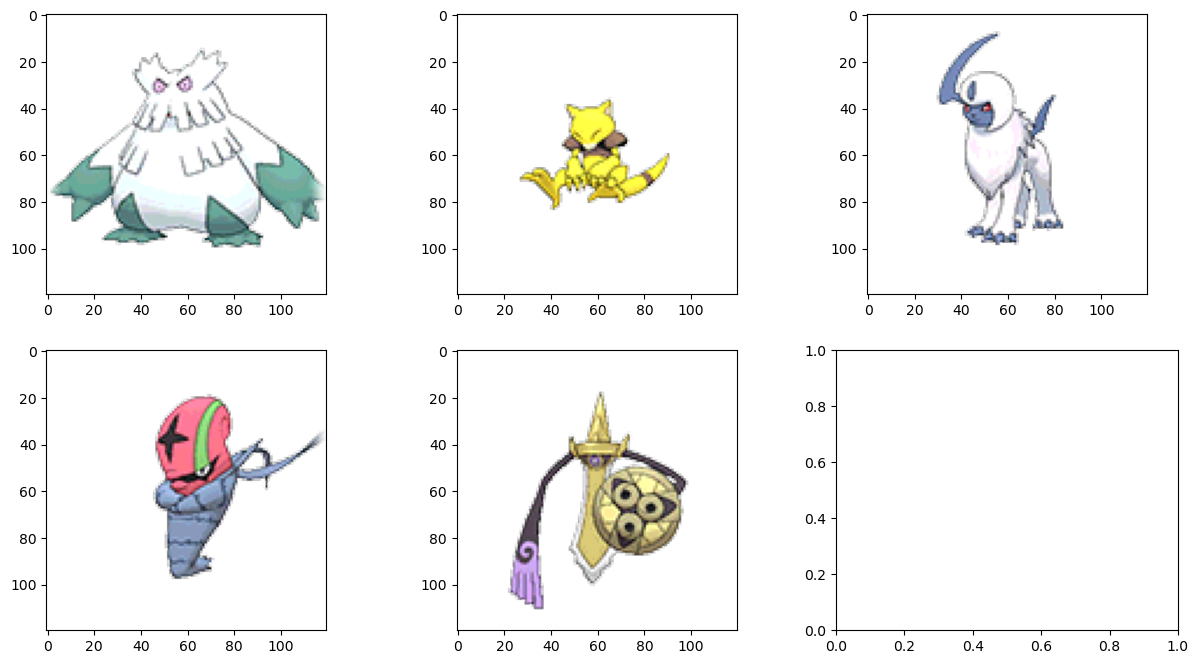

<Figure size 1000x1000 with 0 Axes>

In [22]:
# defining root directory
from PIL import Image

root_dir = "./data/pokemon/images/images"

files =  os.path.join(root_dir)
File_names = os.listdir(files)
print("This is the list of all the files present in the path given to us:\n")
print(File_names)

# plot here
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
first_five = File_names[0:6]

plt.figure(figsize=(10,10))
def subplots():
# Use the axes for plotting
    i = 0
    j = 0
    k = 0
    for k in range(5):
        state = os.path.join(root_dir, first_five[k])
        img = Image.open(state)
        axes[i,j].imshow(img)
        
        if k==2:
            i +=1
            j = 0
        else:
            j += 1

    plt.tight_layout(pad=2);
    
subplots()

In [25]:
## Run the below cells as it is
data = pd.read_csv('./data/pokemon/pokemon.csv')
display(data.head())
labels = data["Type1"].unique()
print(labels)

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [44]:
## Run the below cells as it is
data_dict = {}

for key, val in zip(data["Name"], data["Type1"]):
    data_dict[key] = val
# pprint.pprint(data_dict)

ids = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
labels_idx = dict(zip(labels, ids))

pprint.pprint(labels_idx)

{'Bug': 3,
 'Dark': 15,
 'Dragon': 14,
 'Electric': 6,
 'Fairy': 8,
 'Fighting': 9,
 'Fire': 1,
 'Flying': 17,
 'Ghost': 12,
 'Grass': 0,
 'Ground': 7,
 'Ice': 13,
 'Normal': 4,
 'Poison': 5,
 'Psychic': 10,
 'Rock': 11,
 'Steel': 16,
 'Water': 2}


In [45]:
final_images = []
final_labels = []
count = 0
files =  os.path.join(root_dir)

for file in File_names:
    count += 1
    img = cv2.imread(os.path.join(root_dir, file), cv2.COLOR_BGR2GRAY) 
    label = labels_idx[data_dict[file.split(".")[0]]] 
    # append img in final_images list
    final_images.append(np.array(img))
    # append label in final_labels list
    final_labels.append(np.array(label))
    
# converting lists into numpy array
# normalizing and reshaping the data 
final_images = np.array(final_images, dtype = np.float32) / 255.0
final_labels = np.array(final_labels, dtype = np.int8).reshape(809, 1)

In [46]:
# import necessary libraries
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(120, 120, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(18)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 43200)             0         
                                                                 
 dense (Dense)               (None, 100)               4320100   
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 18)                1818      
                                                                 
Total params: 4342118 (16.56 MB)
Trainable params: 4342118 (16.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
# compile model (Use: Adam optimizer, categorical_crossentropy loss and metrics as Accuracy)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# fit model (use images and labels)
history = model.fit(final_images, final_labels, epochs=50)

Epoch 1/50
26/26 [==============================] - 1s 26ms/step - loss: 3.7498 - accuracy: 0.1112
Epoch 2/50
26/26 [==============================] - 1s 27ms/step - loss: 2.8426 - accuracy: 0.1743
Epoch 3/50
26/26 [==============================] - 1s 26ms/step - loss: 2.5370 - accuracy: 0.2398
Epoch 4/50
26/26 [==============================] - 1s 26ms/step - loss: 2.3928 - accuracy: 0.2546
Epoch 5/50
26/26 [==============================] - 1s 26ms/step - loss: 2.2630 - accuracy: 0.3078
Epoch 6/50
26/26 [==============================] - 1s 26ms/step - loss: 2.0770 - accuracy: 0.3585
Epoch 7/50
26/26 [==============================] - 1s 27ms/step - loss: 1.9032 - accuracy: 0.4005
Epoch 8/50
26/26 [==============================] - 1s 26ms/step - loss: 1.6316 - accuracy: 0.4994
Epoch 9/50
26/26 [==============================] - 1s 25ms/step - loss: 1.5018 - accuracy: 0.5365
Epoch 10/50
26/26 [==============================] - 1s 25ms/step - loss: 1.3320 - accuracy: 0.5921
Epoch 11/

In [53]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(final_images)

print("\n",predictions[1])
id = np.argmax(predictions[1])
print("\nid that we got from the model as prediction: {}\nType of pokemon associted with that id: {} ".format(id, labels[id]))
print("accuracy of the model", history.history['accuracy'][-1])

26/26 [==============================] - 0s 3ms/step

 [2.2198788e-05 3.9190736e-06 1.3760544e-03 1.7271122e-04 1.6904136e-11
 6.6470921e-06 1.4471111e-13 8.8336085e-09 2.1286940e-15 2.2396872e-14
 9.9841845e-01 1.1511647e-11 1.8378691e-11 3.7596757e-09 2.5161440e-12
 1.7796958e-16 2.3277918e-10 5.1775706e-17]

id that we got from the model as prediction: 10
Type of pokemon associted with that id: Psychic 
accuracy of the model 0.9060568809509277


In [52]:
predictions[0]

array([9.99953151e-01, 1.33758233e-19, 2.39601547e-07, 4.22435580e-16,
       5.53273453e-20, 1.35756935e-14, 1.17448603e-22, 1.05461716e-11,
       2.20042928e-24, 1.90005289e-17, 3.87190485e-05, 4.59007742e-06,
       1.60035505e-22, 4.92116113e-12, 3.18214120e-06, 9.59855751e-26,
       1.04760284e-10, 1.12960740e-24], dtype=float32)